해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

In [537]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [538]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [539]:
df = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/read_excel/기타(개설카드수,대출상품수,연체여부)현황.csv',encoding='cp949')

In [541]:
#불필요 컬럼 제거

In [542]:
len(df)

977390

In [543]:
len(df.columns)

8

In [544]:
df['나이'].unique()

array([46, 66, 27, 54, 45, 39, 37, 50, 72, 26, 42, 28, 65, 51, 61, 33, 57,
       48, 56, 55, 34, 59, 32, 53, 44, 84, 38, 40, 35, 25, 60, 76, 41, 43,
       30, 52, 49, 77, 58, 36, 62, 47, 21, 31, 71, 63, 81, 74, 85, 73, 80,
       69, 82, 64, 23, 70, 22, 83, 67, 29, 68, 24, 79, 75, 78],
      dtype=int64)

In [545]:
#df['나이'] = df['나이'].astype(int)

In [546]:
import numpy as np
df['나이'] = np.where((df.나이 >= 10)&(df.나이 < 20),"10대",
                   np.where((df['나이'] >= 30)&(df['나이'] < 40),"30대",
                           np.where((df['나이'] >= 40)&(df['나이'] < 50),"40대",
                                   np.where((df['나이'] >= 50)&(df['나이'] < 60),"50대",
                                           np.where((df['나이'] >= 60)&(df['나이'] < 70),"60대",
                                                   np.where((df['나이'] >= 20)&(df['나이'] < 30),"20대",
                                                            np.where((df['나이'] >= 70)&(df['나이'] < 80),"70대",
                                                                     np.where((df['나이'] >= 80)&(df['나이'] < 100),"80대 이상",0))))))))


In [547]:
df['나이'].unique()

array(['40대', '60대', '20대', '50대', '30대', '70대', '80대 이상'], dtype=object)

In [548]:
df.columns

Index(['JOIN_KEY', '생년월일', '성별', '나이', '개설카드수5', '총대출건수', '총대출상품수', '연체여부'], dtype='object')

In [549]:
개설카드수 = df.iloc[:,:5]
총대출상품수 = df.drop(columns=['개설카드수5','총대출건수','연체여부'])
연체여부 = df.drop(columns=['개설카드수5', '총대출건수', '총대출상품수'])

# 대출 차주수

In [550]:
카운팅 = df.groupby(['성별','나이']).count()
카운팅.reset_index(inplace=True)
카운팅 = pd.pivot_table(카운팅, index = ['나이'],values =['JOIN_KEY'], columns='성별', aggfunc = ['sum']) ############# 변경

In [551]:
카운팅

sum        
       JOIN_KEY        
성별            1       2
나이                     
20대       57710   50624
30대      115398   75570
40대      142418  101936
50대      133236  102153
60대       80422   59925
70대       27560   18883
80대 이상     6444    5111

In [552]:
d = dict(zip(카운팅.columns.levels[1], ['1','2']))
print(d)
카운팅.rename(columns=d, level=1)

{'JOIN_KEY': '1'}


sum        
             1        
성별           1       2
나이                    
20대      57710   50624
30대     115398   75570
40대     142418  101936
50대     133236  102153
60대      80422   59925
70대      27560   18883
80대 이상    6444    5111

In [553]:
카운팅['전체'] = 카운팅.sum(axis=1)

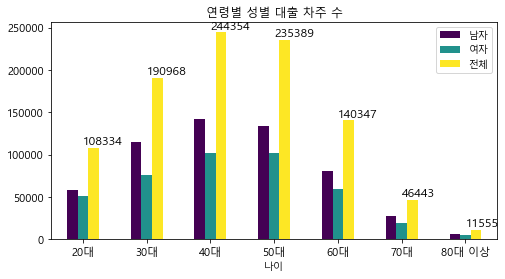

In [554]:
ax = 카운팅.plot(kind='bar', cmap='viridis',figsize=(8,4),fontsize=11)
for i in range(len(카운팅)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=카운팅.iloc[:,2].values[i], s=카운팅.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 대출 차주 수')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '1-1.차주 수.png',bbox_inches='tight')
plt.show()

In [555]:
카운팅['남'] =   카운팅.iloc[:,0]/카운팅['전체'].sum()*100
카운팅['여'] =   카운팅.iloc[:,1]/카운팅['전체'].sum()*100
카운팅['비율(%)'] = 카운팅.iloc[:,2]/카운팅['전체'].sum()*100
카운팅 = 카운팅.round(2)
카운팅

sum              전체      남      여  비율(%)
       JOIN_KEY                                     
성별            1       2                             
나이                                                  
20대       57710   50624  108334   5.90   5.18  11.08
30대      115398   75570  190968  11.81   7.73  19.54
40대      142418  101936  244354  14.57  10.43  25.00
50대      133236  102153  235389  13.63  10.45  24.08
60대       80422   59925  140347   8.23   6.13  14.36
70대       27560   18883   46443   2.82   1.93   4.75
80대 이상     6444    5111   11555   0.66   0.52   1.18

In [556]:
카운팅['비율(%)'].sum()

99.99

In [557]:
비중 = 카운팅.iloc[:,3:]
비중 = 비중.round(2)

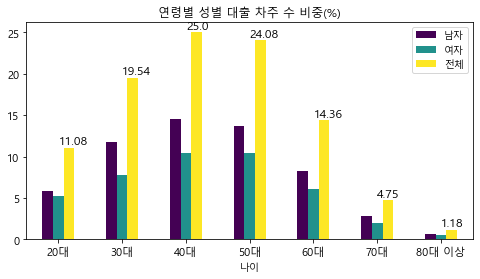

In [558]:
ax = 비중.plot(kind='bar', cmap='viridis', figsize=(8,4), fontsize=11)
for i in range(len(비중)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 대출 차주 수 비중(%)')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '1-2.대출 차주 수.png',bbox_inches='tight')
plt.show()

# 개설카드수

In [559]:
카운팅 = 개설카드수.groupby(['성별','나이']).sum()

In [560]:
카운팅.reset_index(inplace=True)

In [561]:
카운팅.head()

,성별,나이,JOIN_KEY,생년월일,개설카드수5
0,1,20대,209132266066,115083957,377666
1,1,30대,416404561636,229070853,1519610
2,1,40대,515520202151,281333072,2170444
3,1,50대,482392391220,261901260,1910786
4,1,60대,290848122010,157334124,1010567


In [562]:
카운팅 = pd.pivot_table(카운팅, index = ['나이'],values =['개설카드수5'], columns='성별', aggfunc = ['sum'])

In [563]:
카운팅.columns

MultiIndex([('sum', '개설카드수5', 1),
            ('sum', '개설카드수5', 2)],
           names=[None, None, '성별'])

In [564]:
d = dict(zip(카운팅.columns.levels[1], ['1','2']))
print(d)

{'개설카드수5': '1'}


In [565]:
카운팅.columns

MultiIndex([('sum', '개설카드수5', 1),
            ('sum', '개설카드수5', 2)],
           names=[None, None, '성별'])

In [566]:
카운팅.rename(columns=d, level=1)

sum         
              1         
성별            1        2
나이                      
20대      377666   391923
30대     1519610  1088768
40대     2170444  1660809
50대     1910786  1654140
60대     1010567   826014
70대      267408   174684
80대 이상    35921    20046

In [567]:
카운팅['전체'] = 카운팅.sum(axis=1)

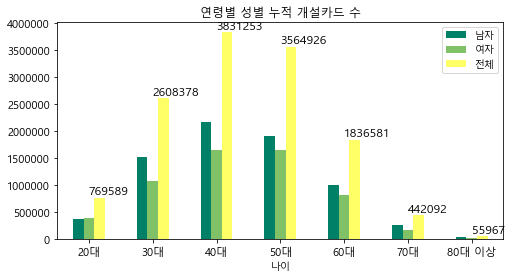

In [568]:
ax = 카운팅.plot(kind='bar', cmap='summer', figsize=(8,4), fontsize=11)
for i in range(len(카운팅)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=카운팅.iloc[:,2].values[i], s=카운팅.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 누적 개설카드 수')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '1-1. 개설카드수.png',bbox_inches='tight')
plt.show()

In [569]:
카운팅

sum                전체
         개설카드수5                  
성별            1        2         
나이                               
20대      377666   391923   769589
30대     1519610  1088768  2608378
40대     2170444  1660809  3831253
50대     1910786  1654140  3564926
60대     1010567   826014  1836581
70대      267408   174684   442092
80대 이상    35921    20046    55967

In [570]:
카운팅['남'] =   카운팅.iloc[:,0]/카운팅['전체'].sum()*100
카운팅['여'] =   카운팅.iloc[:,1]/카운팅['전체'].sum()*100
카운팅['비율(%)'] = 카운팅.iloc[:,2]/카운팅['전체'].sum()*100

In [571]:
#개설카드수
카운팅 = 카운팅.round(2)

In [572]:
카운팅

sum                전체      남      여  비율(%)
         개설카드수5                                       
성별            1        2                              
나이                                                    
20대      377666   391923   769589   2.88   2.99   5.87
30대     1519610  1088768  2608378  11.59   8.31  19.90
40대     2170444  1660809  3831253  16.56  12.67  29.23
50대     1910786  1654140  3564926  14.58  12.62  27.19
60대     1010567   826014  1836581   7.71   6.30  14.01
70대      267408   174684   442092   2.04   1.33   3.37
80대 이상    35921    20046    55967   0.27   0.15   0.43

In [573]:
비중 = 카운팅.iloc[:,3:]

In [574]:
비중

,남,여,비율(%)
,,,
성별,,,
나이,,,
20대,2.88,2.99,5.87
30대,11.59,8.31,19.90
40대,16.56,12.67,29.23
50대,14.58,12.62,27.19
60대,7.71,6.30,14.01
70대,2.04,1.33,3.37
80대 이상,0.27,0.15,0.43


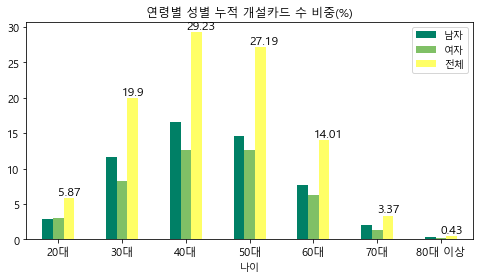

In [575]:
ax = 비중.plot(kind='bar', cmap='summer', figsize=(8,4), fontsize=11)
for i in range(len(비중)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 누적 개설카드 수 비중(%)')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '1-2.누적 개설카드수.png',bbox_inches='tight')
plt.show()

# 총대출상품수(건수)

In [576]:
카운팅 = 총대출상품수.groupby(['성별','나이']).sum()
카운팅.reset_index(inplace=True)
카운팅 = pd.pivot_table(카운팅, index = ['나이'],values =['총대출상품수'], columns='성별', aggfunc = ['sum']) ############# 변경

In [577]:
d = dict(zip(카운팅.columns.levels[1], ['1','2']))
print(d)
카운팅.rename(columns=d, level=1)

{'총대출상품수': '1'}


sum         
              1         
성별            1        2
나이                      
20대      448154   387236
30대     1246639   770146
40대     1711069  1180641
50대     1570389  1136937
60대      840285   601908
70대      237676   154099
80대 이상    46162    33374

In [578]:
카운팅['전체'] = 카운팅.sum(axis=1)

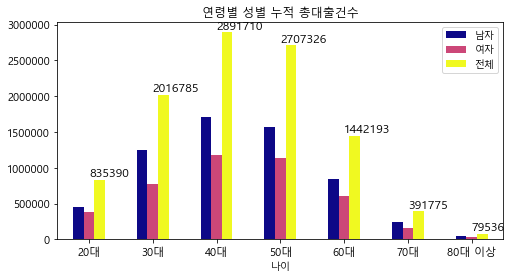

In [579]:
ax = 카운팅.plot(kind='bar', cmap='plasma', figsize=(8,4), fontsize=11)
for i in range(len(카운팅)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=카운팅.iloc[:,2].values[i], s=카운팅.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 누적 총대출건수')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '2-1.총대출건수.png',bbox_inches='tight')
plt.show()

In [580]:
카운팅['남'] =   카운팅.iloc[:,0]/카운팅['전체'].sum()*100
카운팅['여'] =   카운팅.iloc[:,1]/카운팅['전체'].sum()*100
카운팅['비율(%)'] = 카운팅.iloc[:,2]/카운팅['전체'].sum()*100
카운팅 = 카운팅.round(2)
카운팅

sum                전체      남      여  비율(%)
         총대출상품수                                       
성별            1        2                              
나이                                                    
20대      448154   387236   835390   4.32   3.74   8.06
30대     1246639   770146  2016785  12.03   7.43  19.46
40대     1711069  1180641  2891710  16.51  11.39  27.90
50대     1570389  1136937  2707326  15.15  10.97  26.12
60대      840285   601908  1442193   8.11   5.81  13.91
70대      237676   154099   391775   2.29   1.49   3.78
80대 이상    46162    33374    79536   0.45   0.32   0.77

In [581]:
카운팅['비율(%)'].sum()

100.0

In [582]:
비중 = 카운팅.iloc[:,3:]
비중 = 비중.round(2)

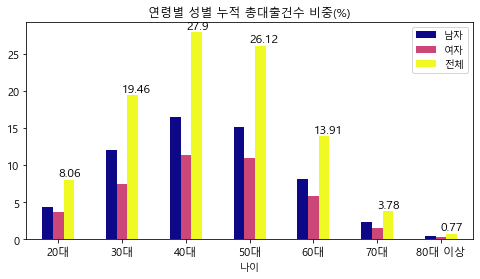

In [583]:
ax = 비중.plot(kind='bar', cmap='plasma', figsize=(8,4), fontsize=11)
for i in range(len(비중)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 누적 총대출건수 비중(%)')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '2-2.총대출건수.png',bbox_inches='tight')
plt.show()

# 연체여부

In [584]:
연체여부['연체여부'].unique()

array(['0', "b'1'"], dtype=object)

In [585]:
연체여부['연체여부'] = 연체여부['연체여부'].map({'0':0,"b'1'":1})

In [586]:
연체 = 연체여부[연체여부.연체여부==1]

In [587]:
len(연체)

3449

In [588]:
카운팅 = 연체.groupby(['성별','나이']).count()

In [589]:
카운팅.reset_index(inplace=True)
카운팅 = pd.pivot_table(카운팅, index = ['나이'],values =['연체여부'], columns='성별', aggfunc = ['sum']) ############# 변경

In [590]:
d = dict(zip(카운팅.columns.levels[1], ['1','2']))
print(d)
카운팅.rename(columns=d, level=1)

{'연체여부': '1'}


sum     
          1     
성별        1    2
나이              
20대     253  143
30대     525  264
40대     646  356
50대     541  293
60대     197  138
70대      47   30
80대 이상   11    5

In [591]:
카운팅['전체'] = 카운팅.sum(axis=1)

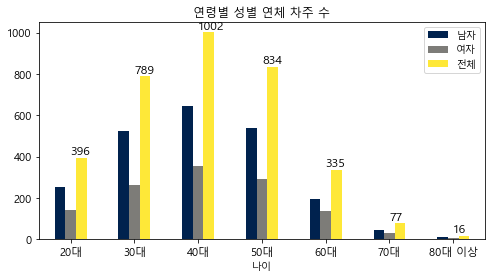

In [592]:
ax = 카운팅.plot(kind='bar', cmap='cividis', figsize=(8,4), fontsize=11)
for i in range(len(카운팅)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=카운팅.iloc[:,2].values[i], s=카운팅.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 연체 차주 수')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '3-1.연체건수.png',bbox_inches='tight')
plt.show()

In [593]:
카운팅['남'] =   카운팅.iloc[:,0]/카운팅['전체'].sum()*100
카운팅['여'] =   카운팅.iloc[:,1]/카운팅['전체'].sum()*100
카운팅['비율(%)'] = 카운팅.iloc[:,2]/카운팅['전체'].sum()*100
카운팅 = 카운팅.round(2)
카운팅

sum         전체      남      여  비율(%)
       연체여부                                
성별        1    2                           
나이                                         
20대     253  143   396   7.34   4.15  11.48
30대     525  264   789  15.22   7.65  22.88
40대     646  356  1002  18.73  10.32  29.05
50대     541  293   834  15.69   8.50  24.18
60대     197  138   335   5.71   4.00   9.71
70대      47   30    77   1.36   0.87   2.23
80대 이상   11    5    16   0.32   0.14   0.46

In [594]:
카운팅['비율(%)'].sum()

99.99000000000001

In [595]:
비중 = 카운팅.iloc[:,3:]
비중 = 비중.round(2)

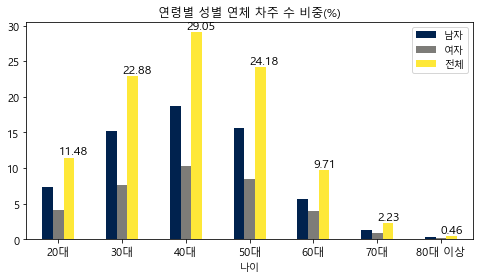

In [596]:
ax = 비중.plot(kind='bar', cmap='cividis', figsize=(8,4), fontsize=11)
for i in range(len(비중)):
    #남
    #ax.text(x=i, y=카운팅.iloc[:,0].values[i], s=카운팅.iloc[:,0].values[i],
            #horizontalalignment='right', verticalalignment ='bottom')
    #여
    #ax.text(x=i, y=카운팅.iloc[:,1].values[i], s=카운팅.iloc[:,1].values[i],
            #horizontalalignment='left', verticalalignment ='bottom')
    #전체
    ax.text(x=i, y=비중.iloc[:,2].values[i], s=비중.iloc[:,2].values[i],
            horizontalalignment='left', verticalalignment ='bottom', fontsize=12)
    
    
plt.legend(labels=['남자','여자','전체'])
plt.title('연령별 성별 연체 차주 수 비중(%)')
plt.xticks(rotation=360)

plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/1.현황분석/png/대출현황/png/'+   '3-2.연체여부.png',bbox_inches='tight')
plt.show()